# Criando a articulação (quadrículas) das imagens (matrizes)

In [23]:
import geopandas as gpd
import numpy as np

In [2]:
gdf_sp = gpd.GeoDataFrame.from_file('GIS/municipio-de-São-Paulo.gpkg')

<AxesSubplot:>

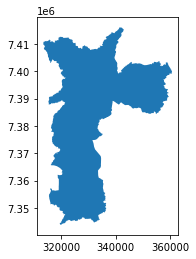

In [5]:
gdf_sp.plot()

In [14]:
xmin, ymin, xmax, ymax = gdf_sp.total_bounds

In [21]:
x_cells = 4
y_cells = 6
cell_x_size = (xmax-xmin) / x_cells
cell_y_size = (ymax-ymin) / y_cells

In [22]:
print(cell_x_size, cell_y_size)

11807.13169258606 12068.92229104042


In [27]:
from shapely.geometry import box

In [76]:
articulacao_nome = np.char.zfill(np.arange(1, (x_cells * y_cells) + 1).astype(str), 2)
# prefix = np.chararray(articulacao_nome.shape, itemsize=3)
# prefix[:] = 'BHM'
# prefix

In [77]:
grid_cells = []

for x in np.arange(xmin, xmax, cell_x_size ):
    for y in np.arange(ymin, ymax, cell_y_size):
        grid_cells.append(box(x, y, x + cell_x_size, y + cell_y_size)  )

gdf_articulacao = gpd.GeoDataFrame(articulacao_nome, geometry=grid_cells, \
                                   columns=['nome'])

In [78]:
# gdf_articulacao.to_file('resultados/articulacao.gpkg', driver='GPKG')

In [91]:
gdf_articulacao.crs = 'EPSG:31983'

In [117]:
articulacao_inter = gdf_articulacao.sindex.query(gdf_sp.geometry[0], predicate='intersects')

In [120]:
articulacao_inter

array([ 1,  2,  3,  4,  5,  0,  6,  7,  8,  9, 10, 11, 17, 16, 15, 21, 22])

<AxesSubplot:>

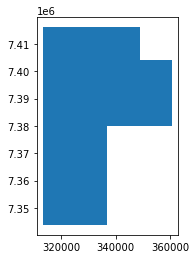

In [123]:
gdf_articulacao.iloc[articulacao_inter].plot()

In [125]:
gdf_articulacao.iloc[articulacao_inter].to_file('resultados/articulacao.gpkg', driver='GPKG')